# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_price_fetch = requests.get(btc_url)
btc_price_fetch

<Response [200]>

In [6]:
#Load BTC price data into python dictionary using json.loads
btc_price_data = json.loads(btc_price_fetch.content.decode('utf-8'))
btc_price_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19173143,
   'total_supply': 19173143,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 19488.54,
     'volume_24h': 17122296607,
     'market_cap': 373804840941,
     'percentage_change_1h': -0.0955953019480968,
     'percentage_change_24h': -0.443594292327612,
     'percentage_change_7d': 0.0596135877121082,
     'percent_change_1h': -0.0955953019480968,
     'percent_change_24h': -0.443594292327612,
     'percent_change_7d': 0.0596135877121082}},
   'last_updated': 1665238139}},
 'metadata': {'timestamp': 1665238139,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [7]:
btc_current_price = btc_price_data['data']['1']['quotes']['USD']['price']
btc_current_price

19488.54

In [8]:
# Fetch current ETH price
eth_price_fetch = requests.get(eth_url)
eth_price_fetch

<Response [200]>

In [9]:
#Load ETH price data into python dictionary using json.loads
eth_price_data = json.loads(eth_price_fetch.content.decode('utf-8'))
eth_price_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120865605,
   'total_supply': 120865605,
   'max_supply': 120862895,
   'quotes': {'USD': {'price': 1326.28,
     'volume_24h': 6012589476,
     'market_cap': 160358604729,
     'percentage_change_1h': -0.148766619262256,
     'percentage_change_24h': -0.477514437787454,
     'percentage_change_7d': -0.215941969913646,
     'percent_change_1h': -0.148766619262256,
     'percent_change_24h': -0.477514437787454,
     'percent_change_7d': -0.215941969913646}},
   'last_updated': 1665238124}},
 'metadata': {'timestamp': 1665238124,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [10]:
eth_current_price = eth_price_data['data']['1027']['quotes']['USD']['price']
eth_current_price

1326.28

In [11]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_current_price
my_eth_value = my_eth * eth_current_price
my_btc_value, my_eth_value

(23386.248, 7029.284)

In [12]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $23386.25
The current value of your 5.3 ETH is $7029.28


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [15]:
# Create the Alpaca API object
alpaca_api = tradeapi.REST( alpaca_api_key,
                            alpaca_secret_key,
                            api_version = 'v2')

In [16]:
# Format current date as ISO format
current_date = pd.Timestamp('2022-10-05', tz = "America/New_York").isoformat()
current_date

'2022-10-05T00:00:00-04:00'

In [17]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [18]:
# Get current closing prices for SPY and AGG
df_stock_current = alpaca_api.get_bars(  tickers,
                                         timeframe,
                                         start = current_date,
                                         end = current_date).df
df_stock_current

open    high     low   close    volume  \
timestamp                                                             
2022-10-05 04:00:00+00:00   96.76   96.99   96.27   96.66   9505965   
2022-10-05 04:00:00+00:00  373.32  379.46  370.95  377.09  87641027   

                           trade_count        vwap symbol  
timestamp                                                  
2022-10-05 04:00:00+00:00        27875   96.527323    AGG  
2022-10-05 04:00:00+00:00       581349  375.456940    SPY

In [19]:
# Reorganize the DataFrame
# Separate ticker data
df_agg_current = df_stock_current[df_stock_current["symbol"] == "AGG"].drop("symbol", axis = 1)
df_spy_current = df_stock_current[df_stock_current["symbol"] == "SPY"].drop("symbol", axis = 1)

In [20]:
# Concatenate the ticker DataFrames
df_stock_current = pd.concat([df_agg_current, df_spy_current], axis = 1, keys=["AGG","SPY"])

In [21]:
# Preview DataFrame
df_stock_current

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2022-10-05 04:00:00+00:00  96.76  96.99  96.27  96.66  9505965       27875   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-10-05 04:00:00+00:00  96.527323  373.32  379.46  370.95  377.09   

                                                            
                             volume trade_count       vwap  
timestamp                                                   
2022-10-05 04:00:00+00:00  87641027      581349  375.45694

In [22]:
# Pick AGG and SPY close prices
agg_close_price = df_stock_current["AGG"]["close"].iloc[0]
spy_close_price = df_stock_current["SPY"]["close"].iloc[0]

In [23]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $96.66
Current SPY closing price: $377.09


In [24]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

In [25]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18854.50
The current value of your 200 AGG shares is $19332.00


### Savings Health Analysis

In [26]:
# Set monthly household income
monthly_income = 12000

In [27]:
# Consolidate financial assets data
total_crypto_value = my_btc_value + my_eth_value
total_share_value = my_agg_value + my_spy_value
total_crypto_value , total_share_value

(30415.532, 38186.5)

In [28]:
# Create savings DataFrame
df_savings = pd.DataFrame([total_crypto_value, total_share_value], index=["crypto", "shares"], columns = ["amount"])

In [29]:
# Display savings DataFrame
display(df_savings)

amount
crypto  30415.532
shares  38186.500

<AxesSubplot:title={'center':'Composition of personal savings'}, ylabel='amount'>

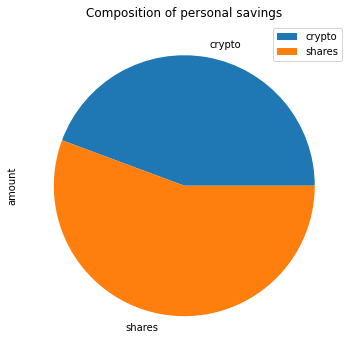

In [30]:
# Plot savings pie chart
df_savings.plot.pie( y="amount", figsize = (6,6), title = "Composition of personal savings")

In [31]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [32]:
# Calculate total amount of savings
total_savings = round(df_savings["amount"].sum(),2)
total_savings

68602.03

In [78]:
# Validate saving health
if total_savings == emergency_fund:
    print (f"Congratulation! Total savings are equal to emergency fund.\n" 
           f"You have reached your financial goal having the ideal emergency fund.")
elif total_savings > emergency_fund:
    print (f"Congratulation! Total savings are greater than the emergency fund. \n"
           f"You have enough money in your fund.")
else:
    gap =  emergency_fund - total_savings
    print (f"You are ${gap:0.2f} away from reaching your financial goal.")

Congratulation! Total savings are greater than the emergency fund. 
You have enough money in your fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [34]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [35]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_historical = alpaca_api.get_bars( tickers,
                                           timeframe,
                                           start = start_date,
                                           end = end_date).df

In [36]:
df_stock_historical.head()

open      high       low   close   volume  \
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                           trade_count        vwap symbol  
timestamp                                                  
2016-05-02 04:00:00+00:00        15119  110.627199    AGG  
2016-05-03 04:00:00+00:00        15662  110.865995    AGG  
2016-05-04 04:00:00+00:00        13982  110.879063    AGG  
2016-05-05 04:00:00+00:00        15707  111.028363    AGG  
2016-05-06 04:00:00+00:00        12697  111.031967    AGG

In [37]:
# Reorganize the DataFrame
# Separate ticker data
df_agg_historical=  df_stock_historical[df_stock_historical["symbol"] == "AGG"].drop("symbol", axis = 1)
df_spy_historical =  df_stock_historical[df_stock_historical["symbol"] == "SPY"].drop("symbol", axis = 1)

In [38]:
# Concatenate the ticker DataFrames
df_stock_data = pd.concat([df_agg_historical, df_spy_historical], axis = 1, keys=["AGG","SPY"])

In [39]:
#remove timestamp from index
df_stock_data.index = df_stock_data.index.date

In [40]:
# Display sample data
df_stock_data.head()

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   

                           SPY                                                 \
                  vwap    open    high     low   close     volume trade_count   
2016-05-02  110.627199  206.90  208.18  206.41  208.03   61908515      263580   
2016-05-03  110.865995  206.50  206.80  205.28  206.13  106422142      377518   
2016-05-04  110.879063  205.00  205.85  204.42  204.96   92199810      345261   
2016-05-05  111.028363  205.57  205.98  204.47  204.95   67597222      280622   
2016-05-06  111.031967  204.04  205.77  203.88  205.70   89131004      340335   

                        
                  vwap  
2016-05-02  207.294812  
2016-05-03  206.312060  
2016-05-04  205.090172  
2016-05-05  205.141555  
2016-05-06  204.937074

In [41]:
drop_columns = ["open","high","low","volume","trade_count", "vwap"]

for x in tickers:
    for y in drop_columns:
        df_stock_data.drop(columns = (x,y), inplace = True)

In [42]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# assume 252 trading days in a year. 30 years means 7560 trading days (30 x 252)
MC_Y30 = MCSimulation(portfolio_data = df_stock_data,
                      weights = [0.40, 0.60],
                      num_simulation = 500 ,
                      num_trading_days = 252*30
                      )

In [43]:
# Printing the simulation input data
MC_Y30.portfolio_data.head()

AGG                  SPY             
             close daily_return   close daily_return
2016-05-02  110.61          NaN  208.03          NaN
2016-05-03  110.81     0.001808  206.13    -0.009133
2016-05-04  110.86     0.000451  204.96    -0.005676
2016-05-05  111.14     0.002526  204.95    -0.000049
2016-05-06  110.97    -0.001530  205.70     0.003659

In [44]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Y30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\twigi\FTBC\W5_Assignment\APIs-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0          1          2          3          4         5    \
0     1.000000   1.000000   1.000000   1.000000   1.000000  1.000000   
1     0.993430   1.000969   1.017816   1.001046   1.002653  1.006515   
2     1.003079   1.011739   1.024340   1.010604   0.989501  1.002658   
3     1.006695   1.008091   1.013787   1.006319   0.979849  1.010859   
4     1.018985   1.009799   1.021878   1.012766   0.980841  1.011807   
...        ...        ...        ...        ...        ...       ...   
7556  9.226613  20.187330  19.587743  26.132065  11.954866  7.405181   
7557  9.254422  20.191006  19.806194  26.247182  12.132461  7.419981   
7558  9.195704  20.186559  19.780561  26.362751  12.180400  7.494007   
7559  9.182972  20.035960  19.650233  26.230556  12.021772  7.431910   
7560  9.105713  20.160148  19.464721  25.968071  11.981488  7.492842   

            6          7         8          9    ...       490        491  \
0      1.000000   1.000000  1.000000   1.000000  ...  1.000000   1.000000   
1      0.993928   0.991788  0.997442   1.007702  ...  1.001247   0.993368   
2      1.003820   0.992353  0.995992   1.008912  ...  1.004432   0.993790   
3      1.006013   0.994745  1.011278   1.021955  ...  1.010155   0.996389   
4      1.006690   0.988873  1.002287   1.025863  ...  1.015634   0.993899   
...         ...        ...       ...        ...  ...       ...        ...   
7556  21.345856  19.861446  9.128565  73.200606  ...  7.220298  18.249472   
7557  21.469231  19.971985  9.113943  73.156573  ...  7.319670  18.287593   
7558  21.402372  20.061568  9.119797  71.939549  ...  7.334035  18.127811   
7559  21.315681  20.176344  9.129394  71.879105  ...  7.338168  18.249193   
7560  21.201848  19.956053  9.037314  72.006432  ...  7.295479  18.464958   

            492       493        494        495        496        497  \
0      1.000000  1.000000   1.000000   1.000000   1.000000   1.000000   
1      0.996376  1.019356   0.990826   1.001157   1.012892   0.998937   
2      0.987560  1.018876   0.997069   0.990271   1.009928   0.993057   
3      0.997237  1.012277   0.998032   0.994687   1.004379   1.008636   
4      1.006328  1.007362   1.000915   0.998103   1.006408   1.001517   
...         ...       ...        ...        ...        ...        ...   
7556  10.621609  6.011688  29.862946  25.401058  22.655983  10.121561   
7557  10.622332  6.033196  30.174678  25.489630  22.627557  10.080617   
7558  10.630522  6.013212  30.319651  25.385592  22.570431  10.033440   
7559  10.761544  5.951746  30.277511  25.621153  22.653576  10.121550   
7560  10.966335  5.939795  30.472250  26.147927  22.714005  10.134267   

            498        499  
0      1.000000   1.000000  
1      0.997225   0.994551  
2      1.002753   0.996819  
3      1.004217   1.000115  
4      0.994941   0.997173  
...         ...        ...  
7556  13.672275  27.716805  
7557  13.593272  27.759842  
7558  13.489854  27.392315  
7559  13.519025  27.343041  
7560  13.647776  27.404290  

[7561 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

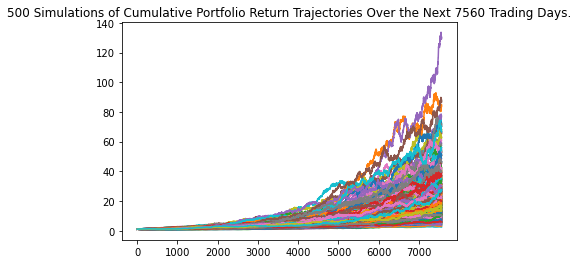

In [45]:
# Plot simulation outcomes
MC_Y30.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

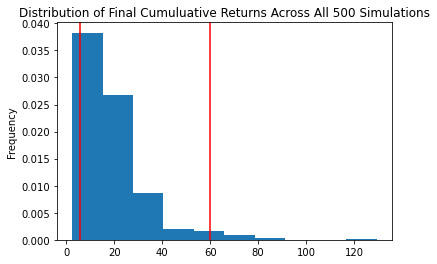

In [46]:
# Plot probability distribution and confidence intervals
MC_Y30.plot_distribution()

### Retirement Analysis

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_Y30_stats = MC_Y30.summarize_cumulative_return()

In [48]:
# Print summary statistics
print(MC_Y30_stats)

count           500.000000
mean             19.186319
std              14.104145
min               2.406158
25%              10.000505
50%              15.493486
75%              22.861347
max             129.410678
95% CI Lower      5.648533
95% CI Upper     59.851691
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [49]:
# Set initial investment
initial_investment = 20000

In [50]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_Y30_stats[8] * initial_investment, 2)
ci_upper = round(MC_Y30_stats[9] * initial_investment, 2)

In [51]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $112,970.66 and $1,197,033.81


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [52]:
# Set initial investment
initial_investment = 20000 * 1.5

In [53]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_Y30_stats[8] * initial_investment, 2)
ci_upper = round(MC_Y30_stats[9] * initial_investment, 2)

In [54]:
## Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $169,455.99 and $1,795,550.72


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [55]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Y05 = MCSimulation(portfolio_data = df_stock_data,
                      weights = [0.10, 0.90],
                      num_simulation = 500 ,
                      num_trading_days = 252*5
                      )

In [56]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Y05.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\twigi\FTBC\W5_Assignment\APIs-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.995947  1.022761  0.989497  1.012938  0.993379  0.995400  1.014112   
2     0.984514  1.015725  0.985316  0.991859  1.006722  0.972610  1.001667   
3     0.994644  1.017164  0.988077  1.022696  1.004684  0.960759  1.004269   
4     0.996018  1.018059  1.011988  1.036214  0.984834  0.978623  0.989841   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.428661  2.894718  1.878253  1.155415  1.791094  2.121384  1.529191   
1257  1.437062  2.896395  1.838159  1.150119  1.816916  2.145928  1.497773   
1258  1.415526  2.894511  1.866605  1.161199  1.790150  2.158820  1.534893   
1259  1.409429  2.879597  1.882765  1.168813  1.776992  2.162631  1.541742   
1260  1.404578  2.875243  1.889326  1.165471  1.790105  2.162945  1.577555   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.983661  0.995735  0.994595  ...  0.995871  0.981250  0.985025   
2     0.980759  0.995888  1.003355  ...  0.996536  0.970809  0.998029   
3     0.989834  0.999507  1.011268  ...  0.999872  0.953855  1.006760   
4     0.989891  0.994173  1.016816  ...  1.000466  0.947666  0.998101   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.794974  1.215406  1.714352  ...  3.658499  2.083188  2.188902   
1257  1.757104  1.204346  1.714223  ...  3.760254  2.106856  2.169781   
1258  1.737857  1.186511  1.714927  ...  3.698438  2.131555  2.173117   
1259  1.748487  1.184402  1.685544  ...  3.712670  2.120732  2.160104   
1260  1.756261  1.168924  1.684822  ...  3.722180  2.131321  2.150989   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.007576  0.997343  1.013310  0.999402  0.993974  0.996295  1.016877  
2     1.016114  1.004189  1.012095  1.011646  0.987665  1.004590  1.032211  
3     1.018752  0.985517  1.002746  1.054995  0.986348  0.999394  1.059998  
4     1.027235  0.980092  1.004177  1.057133  0.975736  1.023823  1.045646  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.662848  2.099313  1.901016  2.229417  3.651574  2.397535  2.774307  
1257  1.639593  2.081120  1.895731  2.206312  3.568742  2.367871  2.773001  
1258  1.647033  2.070615  1.908276  2.169751  3.620628  2.398113  2.768017  
1259  1.659971  2.045861  1.931233  2.203213  3.651640  2.392084  2.752065  
1260  1.641540  2.086031  1.963291  2.204043  3.615224  2.395835  2.803987  

[1261 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

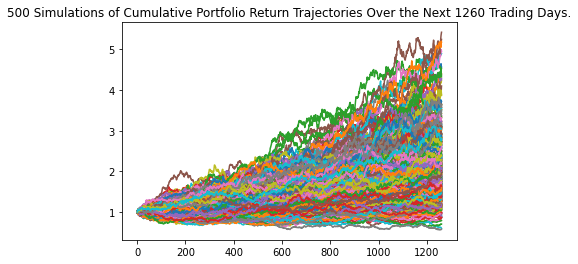

In [57]:
# Plot simulation outcomes
MC_Y05.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

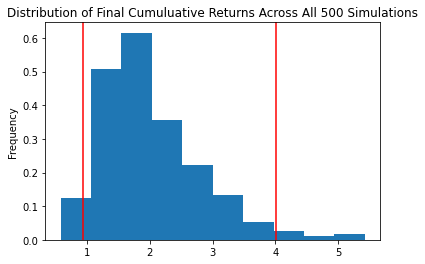

In [58]:
# Plot probability distribution and confidence intervals
MC_Y05.plot_distribution()

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_Y05_stats = MC_Y05.summarize_cumulative_return()

In [60]:
# Print summary statistics
print(MC_Y05_stats)

count           500.000000
mean              2.010253
std               0.796563
min               0.580042
25%               1.460590
50%               1.821318
75%               2.394739
max               5.421999
95% CI Lower      0.929967
95% CI Upper      4.002141
Name: 1260, dtype: float64


In [61]:
# Set initial investment
initial_investment = 20000*5

In [62]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_Y05_stats[8] * initial_investment, 2)
ci_upper_five = round(MC_Y05_stats[9] * initial_investment, 2)

In [63]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.2f} and ${ci_upper_five:,.2f}")

There is a 95% chance that an initial investment of $100,000.00 in the portfolio over the next 5 years will end within in the range of $92,996.67 and $400,214.13


### Ten Years Retirement Option

In [64]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Y10 = MCSimulation(portfolio_data = df_stock_data,
                      weights = [0.30, 0.70],
                      num_simulation = 500 ,
                      num_trading_days = 252*10
                      )

In [65]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Y10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\twigi\FTBC\W5_Assignment\APIs-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.000746  0.996859  0.993787  0.987890  0.997958  0.994990  1.005940   
2     1.006154  0.989039  0.993465  0.989085  1.001390  1.008240  1.006671   
3     1.013094  0.988783  1.006137  1.002464  1.002799  1.021009  1.008795   
4     1.021867  0.978284  0.995313  1.005912  1.009168  1.015845  0.992878   
...        ...       ...       ...       ...       ...       ...       ...   
2516  5.923289  2.806861  1.802748  2.822646  3.686842  1.508934  3.566512   
2517  5.946181  2.779886  1.822813  2.803928  3.672632  1.493311  3.576203   
2518  6.008446  2.747157  1.838794  2.782915  3.655705  1.487045  3.583115   
2519  5.944563  2.747836  1.855016  2.790938  3.687046  1.480656  3.614755   
2520  5.989706  2.738694  1.862251  2.774778  3.693244  1.467827  3.577204   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.991464  1.004727  0.995590  ...  0.999568  1.001854  0.996075   
2     0.989010  1.004459  0.993837  ...  0.985900  0.998663  0.997476   
3     1.000446  0.981143  0.989574  ...  0.981856  1.011487  0.988648   
4     0.996739  0.986347  0.973731  ...  0.978532  1.017171  0.986091   
...        ...       ...       ...  ...       ...       ...       ...   
2516  3.540850  3.227333  3.128292  ...  2.806021  3.087806  1.605798   
2517  3.565326  3.218805  3.128552  ...  2.825982  3.113856  1.620998   
2518  3.537862  3.220938  3.134114  ...  2.806628  3.120163  1.640406   
2519  3.539676  3.233390  3.149893  ...  2.811505  3.156319  1.646962   
2520  3.518251  3.230384  3.145518  ...  2.805870  3.141024  1.622359   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.008920  1.013919  1.005207  1.008320  1.008880  1.000802  1.001255  
2     1.001710  1.019905  1.020783  1.010662  0.998438  1.000353  1.005794  
3     1.007887  1.016468  1.023775  1.001887  0.994497  0.995560  1.013626  
4     1.001901  1.031453  1.023891  1.006411  0.985734  0.996870  1.029253  
...        ...       ...       ...       ...       ...       ...       ...  
2516  3.343228  3.959362  2.570438  1.901099  2.627839  2.036916  2.608631  
2517  3.336166  3.972422  2.586416  1.912917  2.646662  2.046506  2.593961  
2518  3.354931  3.922624  2.630682  1.919242  2.642965  2.042113  2.603215  
2519  3.403040  3.927554  2.637755  1.929197  2.634943  2.046454  2.625559  
2520  3.449004  3.966711  2.636861  1.945320  2.657636  2.061027  2.632711  

[2521 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

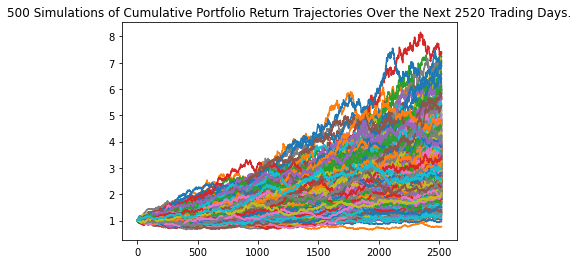

In [66]:
# Plot simulation outcomes
MC_Y10.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

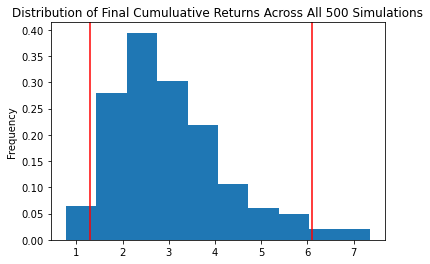

In [67]:
# Plot probability distribution and confidence intervals
MC_Y10.plot_distribution()

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_Y10_stats = MC_Y10.summarize_cumulative_return()

In [69]:
# Print summary statistics
print(MC_Y10_stats)

count           500.000000
mean              3.045558
std               1.221920
min               0.771852
25%               2.143771
50%               2.775124
75%               3.670448
max               7.358730
95% CI Lower      1.286221
95% CI Upper      6.090845
Name: 2520, dtype: float64


In [70]:
# Set initial investment
initial_investment = 20000*8

In [71]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_Y10_stats[8] * initial_investment, 2)
ci_upper_ten = round(MC_Y10_stats[9] * initial_investment, 2)

In [75]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")

There is a 95% chance that an initial investment of $160,000.00 in the portfolio over the next 10 years will end within in the range of $205,795.36 and $974,535.14
